# Filtering in the Time Domain: Part II

In this section, we will begin exploring how time series can be decomposed into a linear combination of sine and cosine funtions. This concept is critically important to time series analysis and will allow us to evaluate time scales of variability in the *frequency* domain.

## Introduction to Harmonics

For oscillatory time series, like those with a distinct seasonal cycle, we can fit **harmonics**, aka, sine and cosine functions (see [Figure 20](harmonics)), to the data in order to remove these oscillations.

```{figure} sine_cosine.png
---
scale: 40%
name: harmonics
---
Sine (red curve) and cosine (blue curve) functions.
```

### Review of the Sine Function

A sine function can be written as,

$$
\begin{align}
y(t) & = A \text{sin}(2\pi ft + \phi)\\
& = A \text{sin}(\omega t + \phi)
\end{align}
$$

where
- $A$ is the amplitude, the deviation of the curve from zero
- $f$ is the frequency in units of the number of oscillations that occur each time step
- $\omega$ = 2$\pi f$ is the angular frequency, or the frequency in units of radians per time step
- $\phi$ is the phase (in radians), or the shift. 


*As a reminder:*

- frequency, $f$: number of oscillations per time step
- period, $T$: number of time steps per oscillation, $\frac{1}{f}$
- wavenumber, $k$ (an integer): number of oscillations that fit inside the domain, $k$ = $fT$.

### Fourier Series

**Fourier Series** is a way of representing a time series as a summation of contributions from harmonic functions, each with a unique temporal scale. These harmonic functions form a [*basis*](https://mathworld.wolfram.com/VectorBasis.html).

This is analogous to regression, where you try to describe one variable as a combination of others. But, in the case of harmonic analysis, the functions to be fit (i.e., the predictors) are sines and cosines:

$$
\text{sin}(2\pi k \frac{t}{T})\\
\text{cos}(2\pi k \frac{t}{T})    
$$

where $k$ is an integer from 1 to $N$/2 (and $N$ is the number of values you have in the time series), and is often called the wavenumber.

Recall that in this case, $k/T = f$.

##### Using this framework, *we can write a time series, $y(t)$*, as

$$
y(t) = A_0 + \sum_{k=1}^{N/2} A_k\text{cos}(2\pi k \frac{t}{T}) +  \sum_{k=1}^{N/2} B_k\text{sin}(2\pi k \frac{t}{T})
$$

where
- $y$ is resolved on the time interval from 0 $\leq$ $t$ $\leq$ $T$
- the length of the time series is $N$ + 1 (note that $N$ needs to be even so that the highest wavenumber is an integer)
- $A_k$ and $B_k$ are the regression coefficients for each predictor each predictor is a harmonic function with frequency 2$\pi k/T$ and thus fits into the interval from $t_1$ = 0 to $t_N$+1 = $T$ an integer $k$ number of times
- if $k$ = 1, the function has frequency 2$\pi$ radians in the full length of the data. This is the lowest resolved frequency.
- if $k$ = $N$/2, the function has frequency 2$\pi$ radians in 2 time steps (and $B_k$ is zero). This is the highest possible wavenumber/frequency that can be resolved using Fourier series, called the *Nyquist frequency*.

There are many animations of how fourier series can be used to create time series that look very different from the individual sine and cosine componenents on youtube: here is [one example](https://www.youtube.com/watch?v=LznjC4Lo7lE&feature=emb_logo).

Let's take a look at plotting some harmonic components using the above equation for $y(t)$.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

We will start by picking a period, $T$, and a sampling rate, $\Delta t$.

In [2]:
# harmonic parameters (period and sampling rate)
T = 4.0
sampling_rate = 0.05

# define time dimension based on period and sampling rate
t = np.arange(0.,T+sampling_rate,sampling_rate)

# length of time series
N = len(t)-1

Note that the period, $T$, divided by $N$ gives the sampling rate. Now, we can plot different harmonic components.

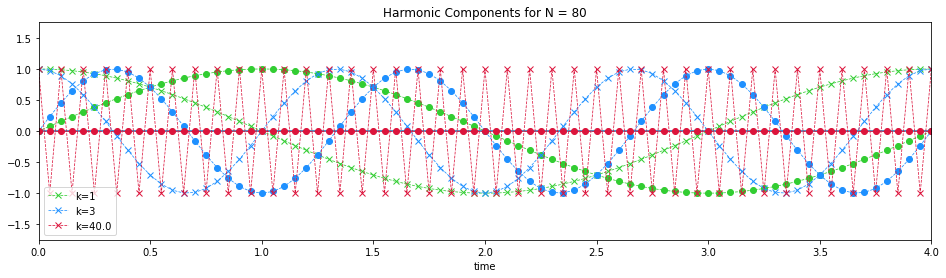

In [3]:
# colours for plotting
CLRs = ['limegreen','dodgerblue','crimson']

# initialize figure
plt.figure(figsize=(16,4))
plt.xlim(np.min(t),np.max(t))
plt.ylim(-1.75,1.75)
plt.xlabel('time')
plt.title('Harmonic Components for N = ' + str(N))
plt.axhline(0)

# counting index for changing the plotting colour
count = 0

# loop over three values for wavenumber, k
for k in (1,3,N/2):
    
    # define sine and cosine components of y(t)
    y1 = np.cos(2.*np.pi*k*t/T)
    y2 = np.sin(2.*np.pi*k*t/T)

    # plot harmonic components
    plt.plot(t,y1,'x--',color = CLRs[count],linewidth = 0.75, label = 'k='+str(k))
    plt.plot(t,y2,'o--',color = CLRs[count],linewidth = 0.75)

    count += 1
    
plt.legend()

What happens when $k$ = $N$/2, the Nyquist frequency? The sine wave component becomes zero at all times.

### Nyquist Wavenumber/Frequency

The *Nyquist wavenumber/frequency* ($k$ = $N$/2) is the highest frequency that can be resolved in your data using Fourier series. Why is this? Why not $k$ = $N$?

As stated above, if $k$ = $N$/2, the function has frequency 2$\pi$ radians in 2 time steps. If $k$ = $N$, this would imply that the function has a frequency of 2$\pi$ radians in 1 time step. But, Hhow can we detect a complete cycle in a single time step? We can't. In other words, we cannot resolve frequencies that are higher than the Nyquist frequency.

Let's take a look what this means using python. First, let's define our harmonic parameters.

In [4]:
# harmonic parameters (period and sampling rate)
T = 10. 
sampling_rate = 0.01

# define time dimension based on period and sampling rate
t = np.arange(0.,T+sampling_rate,sampling_rate)

# length of time series
N = len(t)-1

print("The wavenumber corresponding to the Nyquist frequency is",N/2) # Nyquist wavenumber: k = N/2
print("This means that the Nyquist frequency is", N/2/T,"\n") # using f = k/T

The wavenumber corresponding to the Nyquist frequency is 500.0
This means that the Nyquist frequency is 50.0 



Below, we will examine how the sampling rate affects the resolved frequencies. We will assume that we have a "true" cosine wave and one that we are trying to resolve using a lower-frequency sampling rate. As some point the sampling rate is not sufficient to resolve the frequency/wavenumber of the cosine wave, demonstrating the threshold Nyquist frequency. 

Let's define a new time dimension with a lower-frequency sampling rate:

In [5]:
# low frequency t used to demonstrate how sampling rate effects our ability to detect all frequencies
sampling_rate_low = 1.0

# define time dimension based on period and sampling rate
tl = np.arange(np.min(t),np.max(t)+sampling_rate_low,sampling_rate_low) 

print("The wavenumber corresponding to the Nyquist frequecy for the low-frequency sampling rate is",(len(tl)-1)/2)
print("This means that the Nyquist frequency for the low-frequency sampling rate is", (len(tl)-1)/2/T,"\n")

The wavenumber corresponding to the Nyquist frequecy for the low-frequency sampling rate is 5.0
This means that the Nyquist frequency for the low-frequency sampling rate is 0.5 



Notice how the Nyquist wavenumber/frequency changes. This means that we will only be able to detect the correct frequency of the cosine wave up to wavenumber= 5.0 or frequency = 0.5 for the given sampling rate.

Use the "Live Code/Launch Thebe" button to see what happens when we change $k$ below.

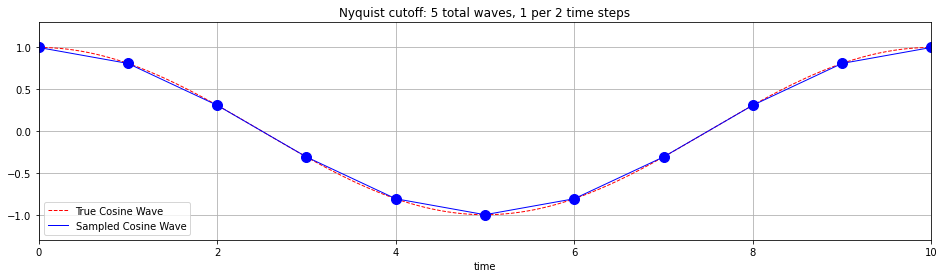

In [6]:
k = 1 # see what happends when you change wavenumber to the following values (1, 3, 5, 7, 10)

# initialize figure
plt.figure(figsize=(16,4))
plt.xlim(np.min(t),np.max(t))
plt.ylim(-1.3,1.3)
plt.xlabel('time')
plt.title('Nyquist cutoff: 5 total waves, 1 per 2 time steps')
plt.grid()

# define cosine wave using high-frequency t: this will be our "true" cosine wave
yh = np.cos(2.*np.pi*k*t/T)

# plot true cosine wave
plt.plot(t,yh,'--',color = 'red', linewidth = 1.,label='True Cosine Wave')

#define harmonics using low-frequency t
yl = np.cos(2.*np.pi*k*tl/T)

plt.plot(tl,yl,'.',color = 'blue',markersize = 20)
plt.plot(tl,yl,'-',color = 'blue', linewidth = 1.,label='Sampled Cosine Wave')
plt.legend()
plt.show()

What happens when $k$ becomes larger than the Nyquist wavenumber, 5? In other words, what happens if we have higher frequencies in our data? In this case, they will get *aliased* onto lower frequencies (e.g. when $k$ = 7 in the above example). This can be a problem when there is a large amount of variance in frequencies higher than the Nyquist frequency. We will revisit the concept of aliasing in the next section.

Note that the Nyquist frequency is completely dependent on your *sampling rate* (temporal resolution of your data), **NOT** the total amount of data you have. The smaller the time step, the higher the Nyquist frequency.

## Method 4: Filtering the Seasonal Cycle using Harmonics

Now, that we have reviewed sine and cosine waves and fourier series, we will explore how we can use harmonics to describe time series with oscillations and take advantage of this to filter such time series.

In this section, we will make sure of a package called [`ccgfilt()`](https://www.esrl.noaa.gov/gmd/ccgg/mbl/crvfit/crvfit.html) to fit harmonic functions to our Arctic SIE time series. You can download a copy of the function [here](https://github.com/kls2177/ccia_files/blob/master/ccgfilt3.py?raw=true).

In [7]:
# import packages
import ccgfilt3 as ccgfilt
import pickle as pickle

Read in the Arctic SIE data.

In [8]:
# read in data
fname = 'SIE_Total.pickle'
with open(fname,'rb') as fp:
    sie,lat,lon = pickle.load(fp, encoding = 'iso8859')
    
# convert sie to time series 
# (I'm using np.ravel but you can also use np.reshape)
sie_ts = np.ravel(sie)

This function needs the time dimension in decimal years.

In [9]:
# convert time to "decimal year"
time = np.arange(1,len(sie_ts)+1)
dtime = time/365.0

Here, we will use the `ccgfilt()` function to fit 5 harmonic functions. You can use the "Live Code/Launch Thebe" button to change the number of harmonics and see what happens.

In [10]:
# create ccgfilt instance
filt = ccgfilt.ccgFilter(dtime,sie_ts/1e12, sampleinterval=0, numpolyterms=0, numharmonics=5, timezero=-1, gap=0, debug=False)

To extract the harmonic component, we can do the following:

In [11]:
# extract the harmonic component of the fit, i.e. the seasonal cycle
sie_season = filt.getHarmonicValue(dtime)

What does this seasonal cycle look like?

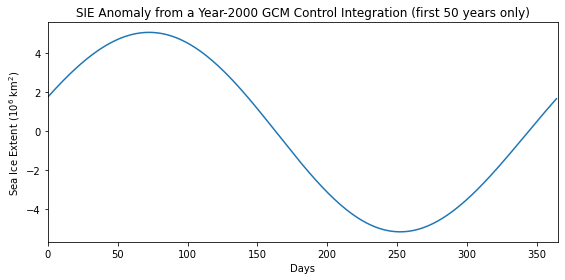

In [12]:
# plot seasonal cycle
plt.figure(figsize=(8,4))
plt.plot(sie_season[0:1*365]) # plot one year of harmonic time series to show seasonal cycle
plt.xlim(0,1*365)
plt.xlabel('Days')
plt.ylabel('Sea Ice Extent (10$^6$ km$^2$)')
plt.title('SIE Anomaly from a Year-2000 GCM Control Integration (first 50 years only)')
plt.tight_layout()

We can now simply substract this harmonic fit from the original time series to filter out the seasonal cycle.

In [13]:
# remove the seasonal cycle from original time series
sie_deseason5 = sie_ts/1e12 - sie_season

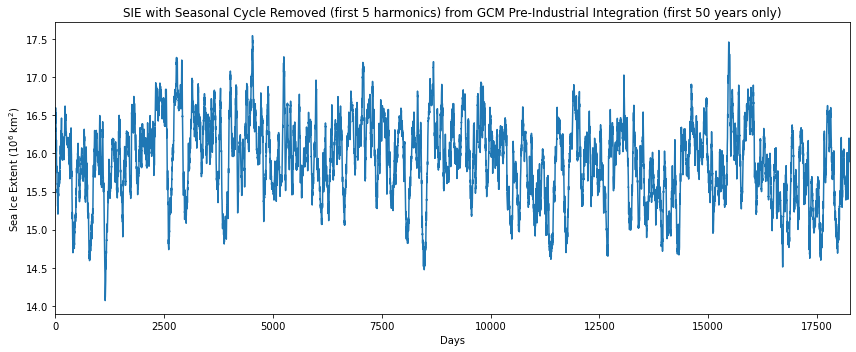

In [14]:
# plot to show that the seasonal cycle has been removed
plt.figure(figsize=(12,5))
plt.plot(sie_deseason5[0:50*365]) #this data consists of 400 years of daily data, but here I am just plotting 50 years
plt.xlim(0,50*365)
plt.xlabel('Days')
plt.ylabel('Sea Ice Extent (10$^6$ km$^2$)')
plt.title('SIE with Seasonal Cycle Removed (first 5 harmonics) from GCM Pre-Industrial Integration (first 50 years only)')
plt.tight_layout()

Note, that the harmonics are fit to the time series with the long-term mean removed (this is the `numpolyterms = 0` parameter). Thus, when we subtract the seasonal cycle, we get an anomaly that fluctuates around the long-term mean.

In the next section, we will build on the concept of Fourier series to explore time scales of variability in the *frequency* domain.